In [2]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import acf, pacf

### First let's figure out how to generate an AR proces

In [3]:
def ar1(phi = .9, n = 100, init = 0):
    time_series = [init]
    error = np.random.randn(n)
    for period in range(n):
        time_series.append(error[period] + phi*time_series[-1])
    return pd.Series(time_series[1:], index = range(n))
    
def ar2(phi1 = .9, phi2 = .8, n = 100, init = 0):
    time_series = [init, init]
    error = np.random.randn(n)
    for period in range(2,n):
        time_series.append(error[period] + phi1*time_series[-1] + phi2*time_series[-2])
    return pd.Series(time_series[1:], index = range(1,n))
    

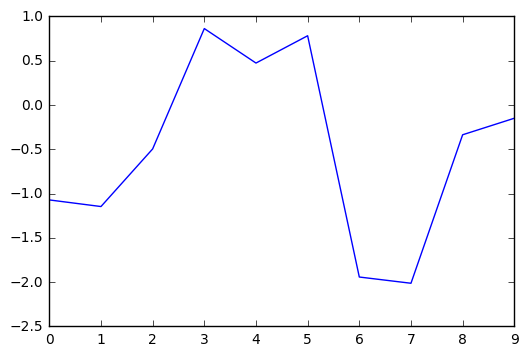

In [4]:
# try out different values of phi >=1 as compared to < 1
# sometimes you need to make a large n to see lack of stationarity
a1 = ar1(phi = .5, n = 10)
a1.plot()

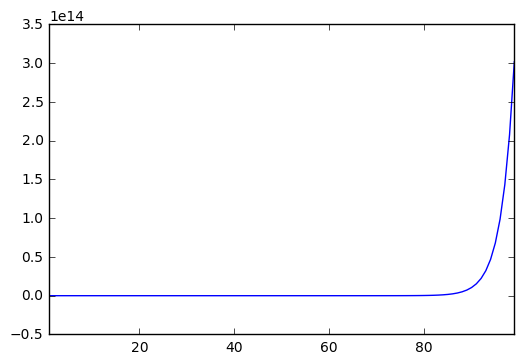

In [6]:
# try out different values of phi >=1 as compared to < 1
# sometimes you need to make a large n to see lack of stationarity
a2 = ar2(n = 100)
a2.plot()

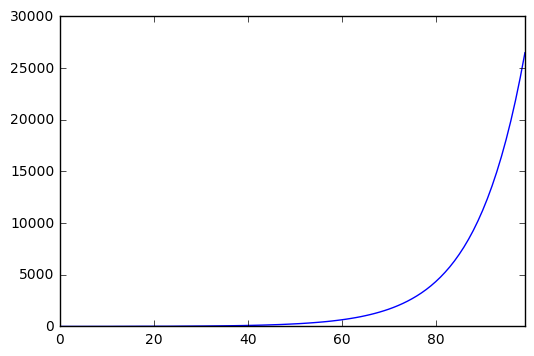

In [24]:
a3 = ar1(phi=1.1)
a3.plot()

### Now let's generate an MA process

In [12]:
def ma1(theta = .5, n = 100):
    time_series = []
    error = np.random.randn(n)
    for period in range(1,n):
        time_series.append(error[period] + theta*error[period-1])
    return pd.Series(time_series[1:], index = range(1,n-1))

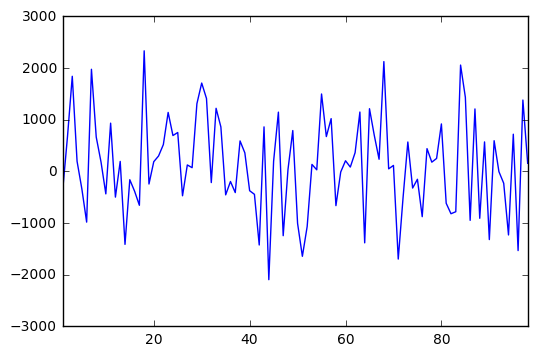

In [25]:
m1 = ma1(theta = -1000)
m1.plot()

### Let's look at ACF + PACF for each kind of process

# AR(1) process

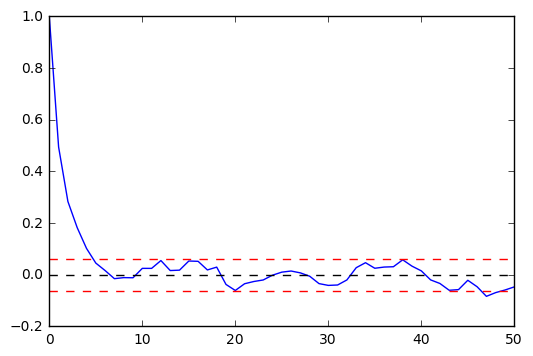

In [26]:
a1 = ar1(phi = .5, n = 1000)
a1_acf = acf(a1, nlags = 50)
plt.plot(a1_acf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(a1)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(a1)),linestyle='--', color = 'red')

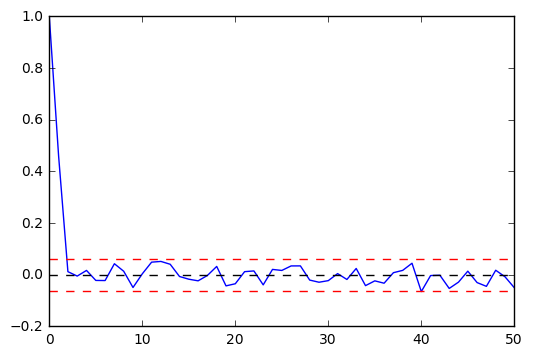

In [27]:
a1 = ar1(phi = .5, n = 1000)
a1_pacf = pacf(a1, nlags = 50)
plt.plot(a1_pacf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(a1)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(a1)),linestyle='--', color = 'red')

# MA(1) process

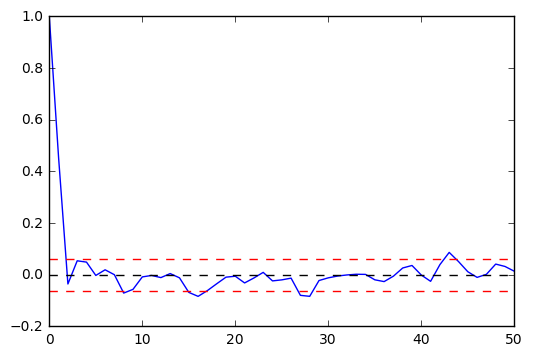

In [28]:
m1 = ma1(n = 1000, theta = .9)
m1_acf = acf(m1, nlags = 50)
plt.plot(m1_acf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(m1)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(m1)),linestyle='--', color = 'red')

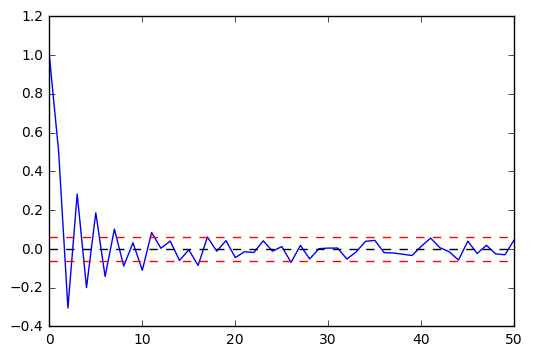

In [29]:
m1 = ma1(n = 1000, theta = .9)
m1_pacf = pacf(m1, nlags = 50)
plt.plot(m1_pacf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(m1)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(m1)),linestyle='--', color = 'red')